## Library and Data Import

In [542]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

import plotly.io as pio
import plotly.express as px

import re
from collections import Counter

pio.renderers.default = "plotly_mimetype+notebook_connected"


ufo_df = pd.read_csv("data/nuforc_reports.csv")

## Axuxiliary functions

In [543]:
def remove_pontuaction(text:str):
    """remove all especial caracter from a text, not including white spaces

    Args:
        text (str): a text with 
    """
    regex_pontuaction = r"[^A-Za-z0-9\s]+"
    
    try:
        text = re.sub(regex_pontuaction, "", text)
        return(text)
    except:
        return(text)


In [544]:
def set_duration(word: str):
    """transform a string into a number in seconds, if fails, return 1.

    Args:
        word (str): a string to be transformed into a number in seconds.
    """
    
    # regex to capture the numbers in the string
    regex_number = r"[0-9]+\.?[0-9]*"
    # regex to capture key words in the string
    regex_word = r"[SseveralmMany]{4, 8}"

    # The default valor of the duration.
    number = 1

    # If the encounter number in the duration return the mean 
    if re.search(regex_number, word):
        numbers = re.findall(regex_number, word)
        numbers = [float(x) for x in numbers]
        number = np.mean(numbers)
    # Othrwise search for key words
    elif re.search(regex_word, word):
        number = 2
    
    
    if number <= 0:
        return(1)
    else:
        return(number)  


In [545]:
def remove_comment(text, simple=False):
    """Remove a comment from a text.

    Args:
        text: a text with the comment. 
    """

    # Regext to capture of the comment
    if simple:
        regex_comment = r"\(.*\)"
    else:
        regex_comment = r"\(\(.*\)\)"
    
    try: 
        text_without_comment = re.sub(regex_comment, "", text)
        return(text_without_comment)  
    except:
        return(text)  


In [546]:
#| label: tbl-dictionary
#| tbl-cap: Data dictionary

# Fonts
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
# https://ourcodingclub.github.io/tutorials/topic-modelling-python/
# https://www.youtube.com/watch?v=bEaxKSQ4Av8
# https://github.com/ddangelov/Top2Vec

from IPython.display import Markdown
from tabulate import tabulate

table = [
  ["Date_Table", "The general date of the sighting."],
  ["Date", "The date and time of the sighting."],
  ["Posted", "When the sighting was posted to the NUFORC site."],
  ["City", "The city of the sighting."],
  ["State", "The 2 character state code of the sighting."],
  ["Country", "The country of the sighting."],
  ["Shape", "The shape of the sighting."],
  ["Duration", "The duration of the sighting in no particular format."],
  ["Link", "A link to the original report on the NUFORC site."],
  ["Image", "If it was provided an image to the report."],
  ["Summary","Summary of the report. Usually the first few sentences."],
  ["Text", "The text of the sighting report."]
  ]
         
Markdown(tabulate(
  table, 
  headers=["COLUMN NAME","DESCRIPTION"]
))

COLUMN NAME    DESCRIPTION
-------------  -------------------------------------------------------
Date_Table     The general date of the sighting.
Date           The date and time of the sighting.
Posted         When the sighting was posted to the NUFORC site.
City           The city of the sighting.
State          The 2 character state code of the sighting.
Country        The country of the sighting.
Shape          The shape of the sighting.
Duration       The duration of the sighting in no particular format.
Link           A link to the original report on the NUFORC site.
Image          If it was provided an image to the report.
Summary        Summary of the report. Usually the first few sentences.
Text           The text of the sighting report.

## First look

Let's take a look at the dataset


In [547]:
ufo_df.sample(10)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
120933,08/2016,8/12/16 00:00,8/16/16,Gainesville,GA,USA,Light,Nite time,No,https://nuforc.org/webreports/reports/129/S129...,I saw blue lights and made different shapes it...,I saw blue lights and made different shapes it...
119305,10/2018,10/6/18 07:30,10/12/18,Hawthorne,CA,USA,Triangle,3 minutes,No,https://nuforc.org/webreports/reports/143/S143...,two lights almost as if fighting each other. ...,two lights almost as if fighting each other. ...
6474,11/1999,11/6/99 18:03,11/9/99,Matawan,NJ,USA,Triangle,3 minutes,No,https://nuforc.org/webreports/reports/010/S104...,Unbelievably large triangular shaped craft wi...,Unbelievably large triangular shaped craft wi...
110941,07/2022,7/28/22 22:00,9/9/22,Kansas City,RI,USA,Light,2 minutes or less,No,https://nuforc.org/webreports/reports/171/S171...,The top of a triangle of stars appeared to be ...,The top of a triangle of stars appeared to be ...
74922,03/2020,3/2/20 17:30,4/9/20,Olathe,KS,USA,Light,2 minutes,No,https://nuforc.org/webreports/reports/153/S153...,15-20 individual circular bright white orb sha...,15-20 individual circular bright white orb sha...
111697,07/2016,7/27/16 09:20,8/2/16,Concord,NH,USA,Changing,2 minutes,No,https://nuforc.org/webreports/reports/128/S128...,I was driving north on main st and was just be...,I was driving north on main st and was just be...
131560,02/2015,2/3/15 21:00,2/12/15,Chesterfield Matoaca,VA,USA,Rectangle,1 minute,No,https://nuforc.org/webreports/reports/117/S117...,"Very Long, 100-150 yds long. Looked like a cra...","Very Long, 100-150 yds long. Looked like a cr..."
70555,09/2013,9/26/13 21:30,9/30/13,High Point,NC,USA,Diamond,30 minutes,No,https://nuforc.org/webreports/reports/102/S102...,Flashing diamond shaped object that change blu...,flashing diamond shaped object that change blu...
25820,07/2012,7/4/12 17:00,8/5/12,Goochland County,VA,USA,Cylinder,3 minutes,No,https://nuforc.org/webreports/reports/090/S907...,White cylinder with a brighter white light in ...,White cylinder with a brighter white light in ...
66896,09/2011,9/8/11 23:00,10/10/11,Claymont,DE,USA,Circle,2:00,No,https://nuforc.org/webreports/reports/083/S838...,45 minutes long and watched us,45 minutes long and watched us \nIT was a cir...


In [548]:
# Dataset shape
print(f'The dataset has {ufo_df.shape[0]} lines and {ufo_df.shape[1]} columns with the following types and number of missing values per columns:\n')

type_df = pd.DataFrame(ufo_df.dtypes,columns=['Column type'])
null_df = pd.DataFrame(ufo_df.isnull().sum(), columns = ['Missing values'])

type_and_null_df = pd.merge(type_df,null_df,right_index=True,left_index=True)

# Dataset 
display(type_and_null_df)


The dataset has 141088 lines and 12 columns with the following types and number of missing values per columns:



,Column type,Missing values
Date_Table,object,0
Date,object,0
Posted,object,0
City,object,3
State,object,26
Country,object,2
Shape,object,0
Duration,object,20
Image,object,0
Link,object,0


## Part 1 - Data cleaning


### Country Column

We can see that the largest number of UFO reports comes from the United States with almost 90% of all reports, secondly Canada with 4% and then the United Kingdom with 2%. The following countries together account for less than 5% of all UFO reports in the world.

In [549]:
(ufo_df.Country
 .value_counts(normalize=True, dropna=False)
 .nlargest(10)
 .apply(lambda x: str(round(x * 100,2)) + '%')
 .to_frame(name='Percentage of sightings per country'))

,Percentage of sightings per country
USA,89.14%
Canada,4.01%
United Kingdom,2.22%
Australia,0.63%
India,0.31%
Mexico,0.27%
Unknown,0.2%
Germany,0.14%
New Zealand,0.14%
South Africa,0.13%


**Given that the concentration of UFO sightings is in the US, we will only work with data from there.**

In [550]:
# Fiter the data to only contain USA.
ufo_df.query('Country == "USA"', inplace=True)

In [551]:
# Veifing if it the worked
ufo_df.Country.unique()

array(['USA'], dtype=object)

### City Column

In the City column, we observed more than 8,000 lines with cities that contain non-characters, which could mean misspelled names. First I fixed all appearances of 'Washington, D.C.', then replaced all appearances of a '?' by 'Unknown' and finally I removed all the comments on the lines, which reduced the number of possible errors from more than 8 thousand to less than 3 thousand cities. Since I'm not a US resident and correcting these errors 1 by 1 can take a lot of effort, as well as the errors represent a small percentage of the database, I decided to leave these lines as they are and continue the analysis.

In [552]:
wrong_city_df = ufo_df.loc[(ufo_df.City.str.contains('[^a-zA-Z\s\.]', na=False)) & (ufo_df.City != 'Washington, D.C.')]

print(wrong_city_df.shape)
wrong_city_df.sample(10)

(6858, 12)


,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
131511,05/2015,5/17/15 22:50,5/29/15,Londonderry/Andover,VT,USA,Circle,10 minutes,No,https://nuforc.org/webreports/reports/119/S119...,A bright big dot in the sky that was yellow wi...,A bright big dot in the sky that was yellow wi...
11554,03/1990,3/15/90 19:00,7/16/03,Valley Mills (near),TX,USA,Oval,2-3 minutes,No,https://nuforc.org/webreports/reports/029/S294...,"Enormous, oval shaped object, hovering over a ...","Enormous, oval shaped object, hovering over a ..."
5304,03/1985,3/14/85 19:13,2/16/00,Bellefontaine (St. Louis County),MO,USA,Chevron,1hr,No,https://nuforc.org/webreports/reports/011/S119...,"Coming home from taking my son to scouts, noti...","Coming home from taking my son to scouts, noti..."
140180,11/1965,11/15/65 16:30,8/30/99,Syosset (Long Island),NY,USA,Disk,5-7 mins,No,https://nuforc.org/webreports/reports/008/S087...,Observed a disk-shaped object about the size o...,Observed a disk-shaped object about the size o...
10105,02/2000,2/10/00 19:30,2/16/00,Alturas (SE of),FL,USA,Fireball,8 minutes,No,https://nuforc.org/webreports/reports/011/S119...,We saw two bright lights traveling SE of Altur...,We saw two bright lights traveling SE of Altur...
1954,07/1979,7/1/79 00:00,1/28/99,Maxwelton Beach (South Whidbey Isl.),WA,USA,circle,2-5 minutes,No,https://nuforc.org/webreports/reports/002/S022...,"Hello. I do not think that this 'sighting', i...","Hello. I do not think that this 'sighting', i..."
66843,09/2011,9/4/11 19:50,10/10/11,Roswell (NO JOKE),NM,USA,Light,3-4 minutes,No,https://nuforc.org/webreports/reports/083/S837...,A light in the sky moving in a zig-zag pattern,A light in the sky moving in a zig-zag pattern...
17301,09/2007,9/2/07 20:45,10/8/07,Modesto (on I-5; 130 miles south of Sacramento),CA,USA,Triangle,40 sec,No,https://nuforc.org/webreports/reports/059/S590...,"Triangular shaped, low altitude, white, solid ...","Triangular shaped, low altitude, white, solid ..."
62331,05/2014,5/24/14 15:11,6/4/14,Saranac Lake (at local resort),NY,USA,Oval,3 minutes,No,https://nuforc.org/webreports/reports/109/S109...,A shiny oval in the sky.,A shiny oval in the sky \nI went outside to si...
28300,08/2007,8/22/07 22:00,10/8/07,Fort Hood/Killeen,TX,USA,Circle,45mins,No,https://nuforc.org/webreports/reports/058/S583...,Weird lights,Weird lights \nMe and my sister where walking ...


In [553]:
# remove unnecessary spaces
ufo_df['City'] = ufo_df.City.str.strip()
# Capitalize the whole column
ufo_df['City'] = ufo_df.City.str.capitalize()

# Replace { with (
ufo_df['City'] = ufo_df.City.str.replace('{', '\(', regex=True)
# Remove all comments
ufo_df['City'] = ufo_df.City.apply(lambda x: remove_comment(x, simple=True))

# Replace all variationof Washington DC 
ufo_df.loc[(ufo_df.City.str.contains('Washington', na=False)) & (ufo_df.State == 'DC'), 'City'] = 'Washington, D.C.'
# Replace all lines with ? with  Unknown
ufo_df.loc[(ufo_df.City.str.contains('\?', na=False)), 'City'] = 'Unknown'


In [554]:
wrong_city_df = ufo_df.loc[(ufo_df.City.str.contains('[^a-zA-Z\s\.]', na=False)) & (ufo_df.City != 'Washington, D.C.')]

print(wrong_city_df.shape)
wrong_city_df.sample(10)

(2607, 12)


,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
19850,07/1998,7/20/98 02:00,11/21/98,Tinley park/i-57,IL,USA,Light,5 to seven min,No,https://nuforc.org/webreports/reports/004/S042...,It looked like two strobe lights flying together,It looked like two strobe lights flying togeth...
422,10/1992,10/1/92 22:00,6/21/00,Henderson/oxford,NC,USA,Cross,not sure,No,https://nuforc.org/webreports/reports/013/S131...,Never seen a UFO....come to Henderson.,Never seen a UFO....come to Henderson. \nA fri...
70220,11/2013,11/25/13 19:00,1/30/15,Lund/hiko/ash springs/alamo,NV,USA,Unknown,~1 minute,No,https://nuforc.org/webreports/reports/117/S117...,"One hoax ""UFO,"" and one possible test plane, o...","One hoax ""UFO,"" and one possible test plane, o..."
129372,09/2016,9/20/16 20:00,10/11/16,Amherst/tonawanda,NY,USA,Sphere,5 minutes+,No,https://nuforc.org/webreports/reports/130/S130...,Bright Green sphere moving slowly west Amherst...,Bright Green sphere moving slowly west Amherst...
33187,10/2013,10/4/13 21:50,10/14/13,Maumee/toledo,OH,USA,Changing,25 minutes,No,https://nuforc.org/webreports/reports/102/S102...,"9 plus orange brown lights, 3 were in a triang...","9 plus orange brown lights, 3 were in a triang..."
80270,07/2010,7/14/10 11:15,7/19/10,El monte/monterey park,CA,USA,Teardrop,1 minute,No,https://nuforc.org/webreports/reports/076/S765...,Gray oval teardrop shaped craft flying over LA...,Gray oval teardrop shaped craft flying over LA...
107863,09/2019,9/16/19 21:00,10/4/19,Kapalua/molokai,HI,USA,Formation,4 minutes,No,https://nuforc.org/webreports/reports/149/S149...,"Four vertical lights, evenly spaced, top three...","Four vertical lights, evenly spaced, top three..."
129076,05/2016,5/19/16 23:00,5/26/16,Coeur d'alene,ID,USA,Circle,20 minutes,No,https://nuforc.org/webreports/reports/127/S127...,Two orange orbs over Canfield Mountain.,"Two orange orbs over Canfield Mountain, Couer ..."
7622,08/1994,8/25/94 20:20,1/12/12,Gila bend/ajo,AZ,USA,Other,20 mins,No,https://nuforc.org/webreports/reports/086/S863...,2 lights moving in west sky at 8pm. one came d...,2 lights moving in west sky at 8pm. one came d...
18918,07/2014,7/4/14 23:30,7/5/14,Boulder/lafayette,CO,USA,Formation,5-10 minutes,No,https://nuforc.org/webreports/reports/111/S111...,"Formation of 4. Greenish white; Flying ""V"" & p...",Formation of 4. Greenish white; Flying V & py...


### State Column

We can observe in the 'State' column that there were few observations with values that do not count in the list of American states (source: https://www.scouting.org/resources/los/states/), since there are few occurrences, I preferred to replace them by 'Unknown' and continue the analysis.

In [555]:
ufo_df.State.unique()

array(['FL', 'NV', 'NC', 'CA', 'AZ', 'TN', 'GA', 'UT', 'TX', 'PA', 'KY',
       'VA', 'OK', 'MN', 'NH', 'WA', 'SC', 'NJ', 'AR', 'MO', 'OH', 'KS',
       'LA', 'CO', 'NY', 'WY', 'IN', 'MT', 'AK', 'IL', 'MI', 'IA', 'ME',
       'OR', 'WI', 'MS', 'ID', 'DE', 'WV', 'MD', 'HI', 'AL', 'CT', 'RI',
       'NM', 'NE', 'Unknown', 'MA', 'VT', 'SD', 'ND', 'Guam', 'DC', 'Ca',
       'Fl', 'Washington, DC', 'ON', 'Ontario', 'AB', nan, '\nMA',
       'American Samoa', 'Quintana Roo', 'NB', 'M0', 'SK',
       'United States Virgin Islands', 'Cornwall', 'MB', 'NS', 'BC',
       'South Carolina'], dtype=object)

In [556]:
(ufo_df.State
 .value_counts()
 .nsmallest(20))

Ca                                1
M0                                1
BC                                1
NS                                1
MB                                1
Cornwall                          1
United States Virgin Islands      1
SK                                1
NB                                1
Washington, DC                    1
Quintana Roo                      1
American Samoa                    1
\nMA                              1
AB                                1
Ontario                           1
Guam                              1
South Carolina                    1
Fl                                5
ON                                5
DC                              139
Name: State, dtype: int64

In [557]:
states_error_lst = (ufo_df.State
                    .value_counts()
                    .nsmallest(19)
                    .index.to_list())



ufo_df.loc[ufo_df.State.isin(states_error_lst), 'State'] = 'Unknown'
ufo_df['State'] = ufo_df.State.fillna('Unknown')

ufo_df.State.unique()



array(['FL', 'NV', 'NC', 'CA', 'AZ', 'TN', 'GA', 'UT', 'TX', 'PA', 'KY',
       'VA', 'OK', 'MN', 'NH', 'WA', 'SC', 'NJ', 'AR', 'MO', 'OH', 'KS',
       'LA', 'CO', 'NY', 'WY', 'IN', 'MT', 'AK', 'IL', 'MI', 'IA', 'ME',
       'OR', 'WI', 'MS', 'ID', 'DE', 'WV', 'MD', 'HI', 'AL', 'CT', 'RI',
       'NM', 'NE', 'Unknown', 'MA', 'VT', 'SD', 'ND', 'DC'], dtype=object)

In [558]:
ufo_df.sample(10)

,Date_Table,Date,Posted,City,State,Country,Shape,Duration,Image,Link,Summary,Text
55005,06/2014,6/23/14 11:30,6/27/14,Canaan,NH,USA,Cigar,1 minute,No,https://nuforc.org/webreports/reports/110/S110...,White elongated pill shaped thing with rounded...,White elongated pill shaped thing with rounded...
106299,10/2020,10/16/20 20:34,12/23/20,Oklahoma city,OK,USA,Light,10 minutes,No,https://nuforc.org/webreports/reports/160/S160...,Bright white lights flying in military formati...,Bright white lights flying in military formati...
138148,06/1945,6/7/45 07:00,9/2/05,Winston-salem,NC,USA,Disk,seconds,No,https://nuforc.org/webreports/reports/045/S457...,I always thought this sighting should be on an...,I always thought this sighting should be on an...
136102,02/2017,2/22/17 19:19,3/10/17,Dothan,AL,USA,Circle,7 minutes,No,https://nuforc.org/webreports/reports/132/S132...,Very bright flashes near Big Dipper. Like not...,Very bright flashes near big dipper. Like not...
62878,04/2014,4/23/14 23:15,5/2/14,Lincoln,CA,USA,Sphere,25-30 seconds,No,https://nuforc.org/webreports/reports/108/S108...,Low alt. flyover of red turning to blue then b...,Low altitude neighborhood flyover of red turni...
141030,06/1954,6/6/54 10:00,2/22/02,Atlanta,GA,USA,Disk,weeks,No,https://nuforc.org/webreports/reports/021/S216...,"U.F.O spoted that had some bugs in it, no not...","U.F.O spoted that had some bugs in it, no not..."
87086,07/2020,7/4/20 23:17,7/9/20,Burlington,VT,USA,Formation,30 minutes,No,https://nuforc.org/webreports/reports/157/S157...,It was at 11:17pm when my wife and went for a ...,It was at 11:17pm when my wife and went for a ...
92010,02/2010,2/12/10 19:30,2/14/10,Sharon,VT,USA,Light,30 to 45 seconds,No,https://nuforc.org/webreports/reports/074/S743...,Airplane-like light which seemed to spawn larg...,Airplane-like light which seemed to spawn larg...
73429,06/2011,6/6/11 22:05,6/12/11,Apple valley,CA,USA,Unknown,20 sec,No,https://nuforc.org/webreports/reports/081/S816...,lights seen above lucerne valley ca.,lights seen above lucerne valley ca. \nas i wa...
69620,09/2001,9/23/01 10:30,10/12/01,Snellville,GA,USA,Other,30 Seconds,No,https://nuforc.org/webreports/reports/019/S196...,Daylight Meteor / Space Debris,Daylight Meteor / Space Debris \nOn Sunday Sep...



### Date_time and Stats columns

First let's transform the date column to date time format.


In [559]:
date = [x[0] for x in ufo_df.Date.str.split(' ')]
time = [' ' + x[-1] for x in ufo_df.Date.str.split(' ')]
day = [(x.split('/')[1] + '/') if (len(x.split('/')) == 3) else '01/' for x in date]

ufo_df['Date_Table'] = day + ufo_df['Date_Table'] + time

In [560]:
ufo_df['Date_Table'] = pd.to_datetime(ufo_df['Date_Table'], format='%d/%m/%Y %H:%M', errors='coerce')
ufo_df['Date'] = pd.to_datetime(ufo_df['Date'], format='%m/%d/%y %H:%M', errors='coerce')
ufo_df['Posted'] = pd.to_datetime(ufo_df['Date'], format='%m/%d/%y', errors='coerce')


print('### DATE TABLE ###')
print(f'The first date in the data_time column is: {ufo_df.Date_Table.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Date_Table.max()}\n')

print('### DATE SIGHTING ###')
print(f'The first date in the data_time column is: {ufo_df.Date.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Date.max()}\n')

print('### DATE POSTED ###')
print(f'The first date in the data_time column is: {ufo_df.Posted.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Posted.max()}\n')

### DATE TABLE ###
The first date in the data_time column is: 1721-02-01 05:24:00

The last date in the data_time column is: 2022-10-08 21:00:00

### DATE SIGHTING ###
The first date in the data_time column is: 1969-01-01 10:00:00

The last date in the data_time column is: 2068-12-25 03:00:00

### DATE POSTED ###
The first date in the data_time column is: 1969-01-01 10:00:00

The last date in the data_time column is: 2068-12-25 03:00:00



In [561]:
ufo_df['Date'] = ufo_df.Date_Table
ufo_df.drop(columns=['Date_Table' , 'Posted'], inplace=True)

ufo_df['Year'] = ufo_df.Date.dt.year
ufo_df['Month'] = ufo_df.Date.dt.month
ufo_df['Day_of_Month'] = ufo_df.Date.dt.day
ufo_df['Day_of_Week'] = ufo_df.Date.dt.weekday
ufo_df['Day_Name'] = ufo_df.Date.dt.day_name()
ufo_df['Hour'] = ufo_df.Date.dt.hour

print('### DATE SIGHTING ###')
print(f'The first date in the data_time column is: {ufo_df.Date.min()}\n')
print(f'The last date in the data_time column is: {ufo_df.Date.max()}\n')

### DATE SIGHTING ###
The first date in the data_time column is: 1721-02-01 05:24:00

The last date in the data_time column is: 2022-10-08 21:00:00



In [562]:
ufo_df.sample(10)

,Date,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Year,Month,Day_of_Month,Day_of_Week,Day_Name,Hour
14808,1989-08-18 12:00:00,Ft. carson ; i-25 south,NM,USA,Disk,30 seconds,No,https://nuforc.org/webreports/reports/086/S863...,While I was driving my car an unknown object w...,While I was driving my car an unknown object w...,1989.0,8.0,18.0,4.0,Friday,12.0
15372,2000-04-22 23:15:00,Lake charles,LA,USA,Triangle,10 min.,No,https://nuforc.org/webreports/reports/012/S126...,My girlfrind and myself were out stargazing wh...,My girlfrind and myself were out stargazing wh...,2000.0,4.0,22.0,5.0,Saturday,23.0
129964,2015-08-23 20:09:00,Lavallette,NJ,USA,Flash,4 seconds,No,https://nuforc.org/webreports/reports/121/S121...,"Light moving horizonally pulsing and level, no...","Light moving horizonally pulsing and level, no...",2015.0,8.0,23.0,6.0,Sunday,20.0
62876,2014-04-23 23:00:00,Mount vernon,WA,USA,Chevron,10 minutes,No,https://nuforc.org/webreports/reports/108/S108...,((HOAX)) Looked like a flying Chevrolet Tahoe...,Looked like a flying Chevrolet Tahoe that shot...,2014.0,4.0,23.0,2.0,Wednesday,23.0
91001,2009-03-14 20:58:00,Richfield,UT,USA,Disk,3.5 minutes,No,https://nuforc.org/webreports/reports/069/S692...,"Perfectly round, extremely bright craft appear...","Perfectly round, extremely bright craft appear...",2009.0,3.0,14.0,5.0,Saturday,20.0
127615,2019-02-23 06:30:00,Riverton,UT,USA,Cone,25,No,https://nuforc.org/webreports/reports/144/S144...,I was on my way to work when I noticed this re...,I was on my way to work when I noticed this re...,2019.0,2.0,23.0,5.0,Saturday,6.0
106242,2020-10-13 23:20:00,Federal way,WA,USA,Unknown,~30 minutes,No,https://nuforc.org/webreports/reports/159/S159...,Unknown,NaN,2020.0,10.0,13.0,1.0,Tuesday,23.0
33167,2013-11-09 17:30:00,Kuparuk oilfield,AK,USA,Light,10 minutes,No,https://nuforc.org/webreports/reports/104/S104...,Bright light above the clouds shines a beam do...,Bright light above the clouds shines a beam do...,2013.0,11.0,9.0,5.0,Saturday,17.0
88151,2010-08-28 20:45:00,Davie,FL,USA,Light,15 Minutes,No,https://nuforc.org/webreports/reports/077/S775...,South West Broward FL Orange Redish Lights Fly...,South West Broward FL Orange Redish Lights Fly...,2010.0,8.0,28.0,5.0,Saturday,20.0
48865,2001-08-01 01:00:00,Louisville,KY,USA,Unknown,Seconds,No,https://nuforc.org/webreports/reports/144/S144...,Lightening storm with possible UFO at top left...,Lightening storm with possible UFO at top left...,2001.0,8.0,1.0,2.0,Wednesday,1.0


## Shape

In [563]:
ufo_df['Shape'] = ufo_df.Shape.str.capitalize()
ufo_df.loc[ufo_df['Shape'] == 'Other', 'Shape'] = 'Unknown'


pd.DataFrame(ufo_df.Shape.value_counts(ascending=False)).style.set_caption('Number of Sighting per Shape of Ufo')

,Shape
Light,25445
Unknown,22824
Circle,13324
Triangle,11361
Fireball,8791
Sphere,8164
Disk,7217
Oval,5390
Formation,4185
Changing,3239


### Duration column

In this columns the duration was recorded as a string but we can see a pattern that is: "Duration Scale". A duration followed by a white space and a duration scale. We splited the column into two parts and treated them individually. 


In [564]:
# Index for the duration column
duration_index_not_null = ufo_df['Duration'].loc[ufo_df['Duration'].isnull() == False].index

duration_full_lst = ufo_df['Duration'].loc[ufo_df['Duration'].isnull() == False]



duration_lst = [
    duration[0] for duration in duration_full_lst.str.split('\s+?')
]

scale_lst = [
    scale[1] if len(scale) > 1 else
    scale[0] for scale in duration_full_lst.str.split(' ')
]

First let's transform the scale list to numbers


In [565]:
Counter(scale_lst).most_common(10)

[('minutes', 46345),
 ('seconds', 24435),
 ('Unknown', 6414),
 ('minute', 5885),
 ('min', 4972),
 ('hours', 2856),
 ('hour', 2805),
 ('min.', 2083),
 ('mins', 1668),
 ('sec', 1658)]

We used a list comprehension return a number depending on the string, if the string contains:
    
- seconds, than return 1.
- minutes, then return 60.
- hours, then return 3600.
- days, then return 86400.
- years, then return 2628000.
- years, then return 31556952.
- otherwise return 0.

After we calculate the median to input where the number  is 0.



In [566]:
# Transforming from strig to numbers
scale_temp = [
    1 if re.match(r'^sec|Sec|SEC', scale) else
    60 if re.match(r'^mi|Mi|MI', scale) else
    3600 if re.match( r'^ho|Ho|HO', scale) else
    86400 if re.match(r'^[days]{3,4}', scale) else
    2628000 if re.match(r'^year|Month|MONTH', scale) else
    31556952 if re.match(r'^[YEARSyears]{4,5}', scale) else
    0 for scale in scale_lst
]

# Mean scale column
scale_median = round(np.median(scale_temp), 0)


# Input the median in the scale list
scale_lst = [
    scale_median if scale == 0 else
    scale for scale in scale_temp
]


Following the distribution of the result scale list


In [567]:
pd.DataFrame(Counter(scale_lst).most_common(), columns = ['Scale', 'Count'])

,Scale,Count
0,60,89029
1,1,30290
2,3600,6204
3,86400,151
4,2628000,42
5,31556952,32


Now let's work with the duration list. First we created a function to retrive numbers from the duration list and return the mean.


In [568]:
# Transformning durtion list to numbers
duratin_lst = [set_duration(word) for word in duration_lst]

# Multiply the durtion by the scale to have the result integer value for the duration column
Result = []
for duration, scale in zip(duratin_lst, scale_lst):
  Result.append(duration * scale)

# Save the median to input the missing value for the duration column
duration_median = np.median(Result)

With the two lists os numbers(durtion and scale) we can multiply and place the result in a new column named "duration_sec" on the same index of the orifinal column. 

In [569]:

# Create a new column named "duration_sec" that defaults to the median duration in seconds. 
ufo_df['duration_sec'] = duration_median
# Input the values of duration in seconds in the new column.
ufo_df.loc[duration_index_not_null, 'duration_sec'] = Result


Now the most recurrent values in the new duration column:

In [570]:
pd.DataFrame(Counter(ufo_df['duration_sec']).most_common(10), columns = ['Duration (in seconds)', 'Count'])

,Duration (in seconds),Count
0,60.0,23924
1,300.0,11449
2,120.0,8504
3,600.0,7938
4,180.0,6275
5,900.0,5265
6,30.0,4445
7,1800.0,3994
8,1200.0,3877
9,10.0,3649


Bellow the ditribution of the new column:

Text(0.5, 1.0, 'Boxplot Scale distribution in the duration column')

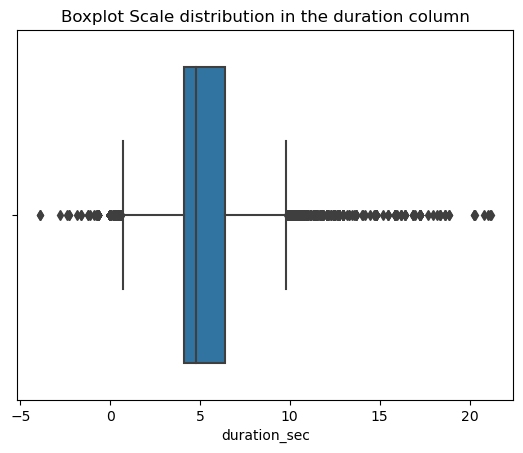

In [571]:
sns.boxplot(x = np.log(ufo_df['duration_sec']))
plt.title('Boxplot Scale distribution in the duration column')

Text(0.5, 1.0, 'Scale Histogram in the duration column')

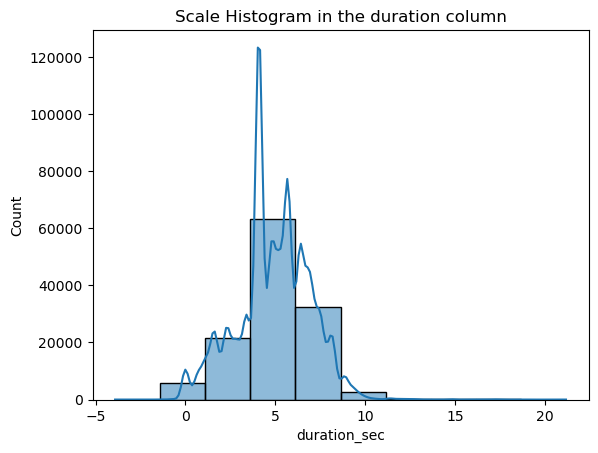

In [572]:
sns.histplot(x = np.log(ufo_df['duration_sec']), kde=True, bins = 10)
plt.title('Scale Histogram in the duration column')

Let's take a look if the maximum and maximum values correspond to the original duration column. 

In [631]:
# Original duration column, New duration column and text  when new duration column is the maximum value.
ufo_df.loc[
    ufo_df[ufo_df['duration_sec'] == ufo_df['duration_sec'].min()].index,
    ['Duration', 'duration_sec','Text']].values

array([['0.02 sec', 0.02,
        "High speed moving fireball fallow by a bright tail . \nI have seen on my security monitor's screen for a fraction of second a bright ball of light moving with high speed trough visible angle of the security video camera. \nThe event has been recorded on tape by permanent recording system. After that I clapped the event to separate the importance frames. The clip can be visibly on the internet. In my opinion the object looks like a meteorite. The angle is almost parallel to the ground video camera B/W is at 3 feet high from the ground."],
       ['0.02 seconds', 0.02,
        'Saw blue object as it passed in sky over apartments ... only for a few seconds before it disappeared into the clouds \n']],
      dtype=object)

In [630]:
# Original duration column, New duration column and text  when new duration column is the minimum value.
ufo_df.loc[
    ufo_df[ufo_df['duration_sec'] == ufo_df['duration_sec'].min()].index,
    ['Duration', 'duration_sec','Text']].values

array([['0.02 sec', 0.02,
        "High speed moving fireball fallow by a bright tail . \nI have seen on my security monitor's screen for a fraction of second a bright ball of light moving with high speed trough visible angle of the security video camera. \nThe event has been recorded on tape by permanent recording system. After that I clapped the event to separate the importance frames. The clip can be visibly on the internet. In my opinion the object looks like a meteorite. The angle is almost parallel to the ground video camera B/W is at 3 feet high from the ground."],
       ['0.02 seconds', 0.02,
        'Saw blue object as it passed in sky over apartments ... only for a few seconds before it disappeared into the clouds \n']],
      dtype=object)

As we can see above the result column could capture the minumum and maximum values correctly. 

In [633]:
# Remove unnecessary columns from the data
ufo_df['Duration'] = ufo_df['duration_sec']
ufo_df.drop(columns=['duration_sec'], inplace=True)

### Text column

In the text column we have comments from the Nuforc organization with the following pattern: (("SOME TEXT")). To treat it we will create a new functions to remove it. 

In [634]:
# Remove comments from the text. 
ufo_df['Text'] = ufo_df['Text'].apply(remove_comment)

### Final Result

In [635]:
ufo_df.sample(10)

,Date,City,State,Country,Shape,Duration,Image,Link,Summary,Text,Year,Month,Day_of_Month,Day_of_Week,Day_Name,Hour
134436,2016-10-19 22:00:00,Gainseville,FL,USA,Light,10800.0,No,https://nuforc.org/webreports/reports/130/S130...,Red and white blinking lights moving like sate...,Red and white blinking lights moving like sate...,2016.0,10.0,19.0,2.0,Wednesday,22.0
21163,2007-10-16 15:00:00,Kingston,NY,USA,Light,3.0,No,https://nuforc.org/webreports/reports/059/S592...,Ball of light moves slowly behind a tree & dis...,Ball of light moves slowly behind a tree & dis...,2007.0,10.0,16.0,1.0,Tuesday,15.0
105872,2021-01-07 23:46:00,Fuera bush/delmar,NY,USA,Light,1410.0,No,https://nuforc.org/webreports/reports/162/S162...,Major light movement sin sky causing mass surv...,Major light movement sin sky causing mass surv...,2021.0,1.0,7.0,3.0,Thursday,23.0
59074,2012-04-07 21:00:00,Cedar park,TX,USA,Changing,2700.0,No,https://nuforc.org/webreports/reports/088/S882...,Lights over cedar park,lights over cedar park \nWe saw two objects mo...,2012.0,4.0,7.0,5.0,Saturday,21.0
53692,2002-10-14 19:02:00,Creswell,OR,USA,Fireball,1800.0,No,https://nuforc.org/webreports/reports/025/S255...,SLOW MOVING COMET LOOKING OBJECT SPOTTED NEAR ...,SLOW MOVING COMET LOOKING OBJECT SPOTTED NEAR ...,2002.0,10.0,14.0,0.0,Monday,19.0
53981,2002-07-19 22:00:00,Heber springs,AR,USA,Fireball,6960.0,No,https://nuforc.org/webreports/reports/024/S242...,Not alot of motion.,Not alot of motion. \nWe were driving east of ...,2002.0,7.0,19.0,4.0,Friday,22.0
134546,2017-02-18 21:00:00,Sioux falls,SD,USA,Sphere,900.0,No,https://nuforc.org/webreports/reports/132/S132...,We saw very bright round shape in the sky west...,We saw very bright round shape in the sky west...,2017.0,2.0,18.0,5.0,Saturday,21.0
28732,2007-04-19 23:00:00,Greenville,MI,USA,Light,900.0,No,https://nuforc.org/webreports/reports/056/S563...,strange neon color lights come together as one...,strange neon color lights come together as one...,2007.0,4.0,19.0,3.0,Thursday,23.0
7042,1995-04-15 22:00:00,Asheville,NC,USA,Triangle,60.0,No,https://nuforc.org/webreports/reports/014/S149...,it hovered above us for a while.....,it hovered above us for a while..... \nwe were...,1995.0,4.0,15.0,5.0,Saturday,22.0
17639,2007-06-05 22:45:00,Bloomington,IN,USA,Unknown,10.0,No,https://nuforc.org/webreports/reports/056/S569...,"Large, Low and Fast Silver Object Over Bloomin...","Large, Low and Fast Silver Object Over Bloomin...",2007.0,6.0,5.0,1.0,Tuesday,22.0


## Part 2 - Data Analysis

- what city with the most ufo sights?
- what state with the most ufo sights?
- What is the most common shape of ufos?
- How does ufo sights behave over time?
- How does ufo sights differ geographically?


### what cities with the most ufo sights?


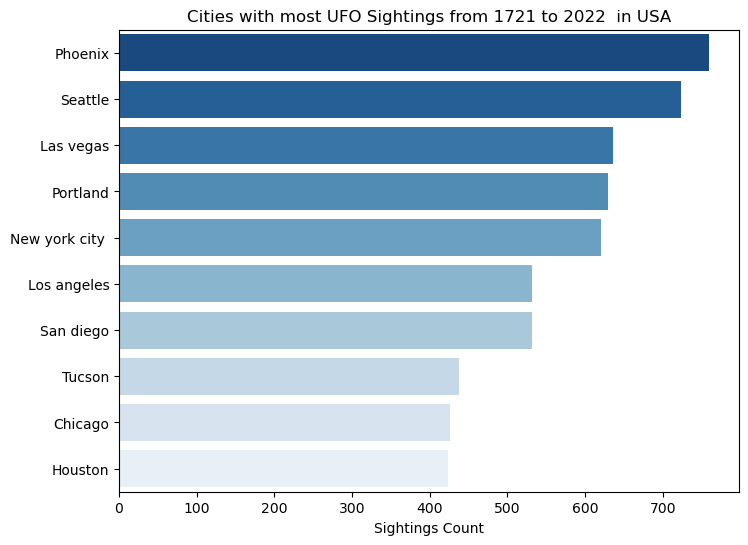

In [621]:
plt.figure(figsize=(8,6))
top_city = ufo_df.City.value_counts().nlargest(10)


sns.barplot(x=top_city, y=top_city.index, palette='Blues_r')
plt.xlabel('Sightings Count')
plt.title('Cities with most UFO Sightings from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()));

### what state with the most ufo sights?


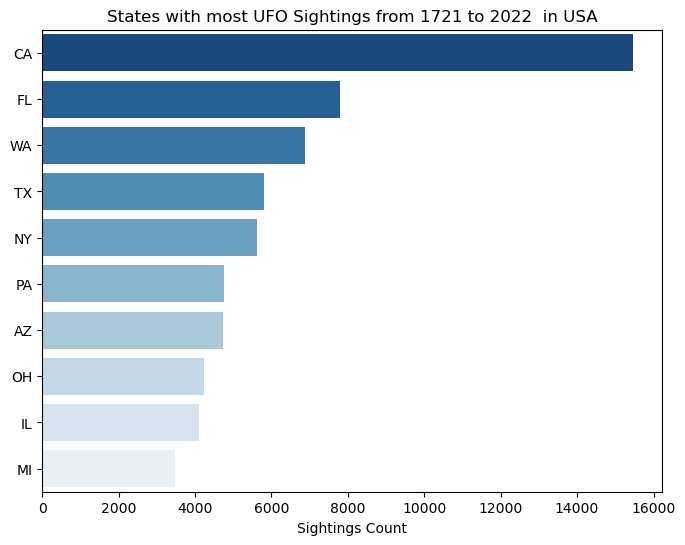

In [623]:
plt.figure(figsize=(8,6))
top_state = ufo_df.State.value_counts().nlargest(10)


sns.barplot(x=top_state, y=top_state.index, palette='Blues_r')
plt.xlabel('Sightings Count')
plt.title('States with most UFO Sightings from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()));

### What is the most common shape of ufos?


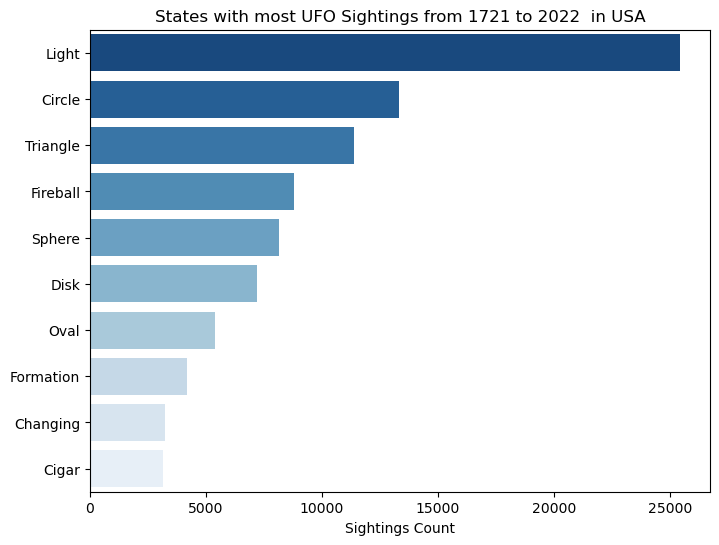

In [627]:
plt.figure(figsize=(8,6))
top_shape = ufo_df.loc[~ufo_df.Shape.isin(['Unknown'])].Shape.value_counts().nlargest(10)


sns.barplot(x=top_shape, y=top_shape.index, palette='Blues_r')
plt.xlabel('Sightings Count')
plt.title('States with most UFO Sightings from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()));

### How does ufo sights behave per year and Month?

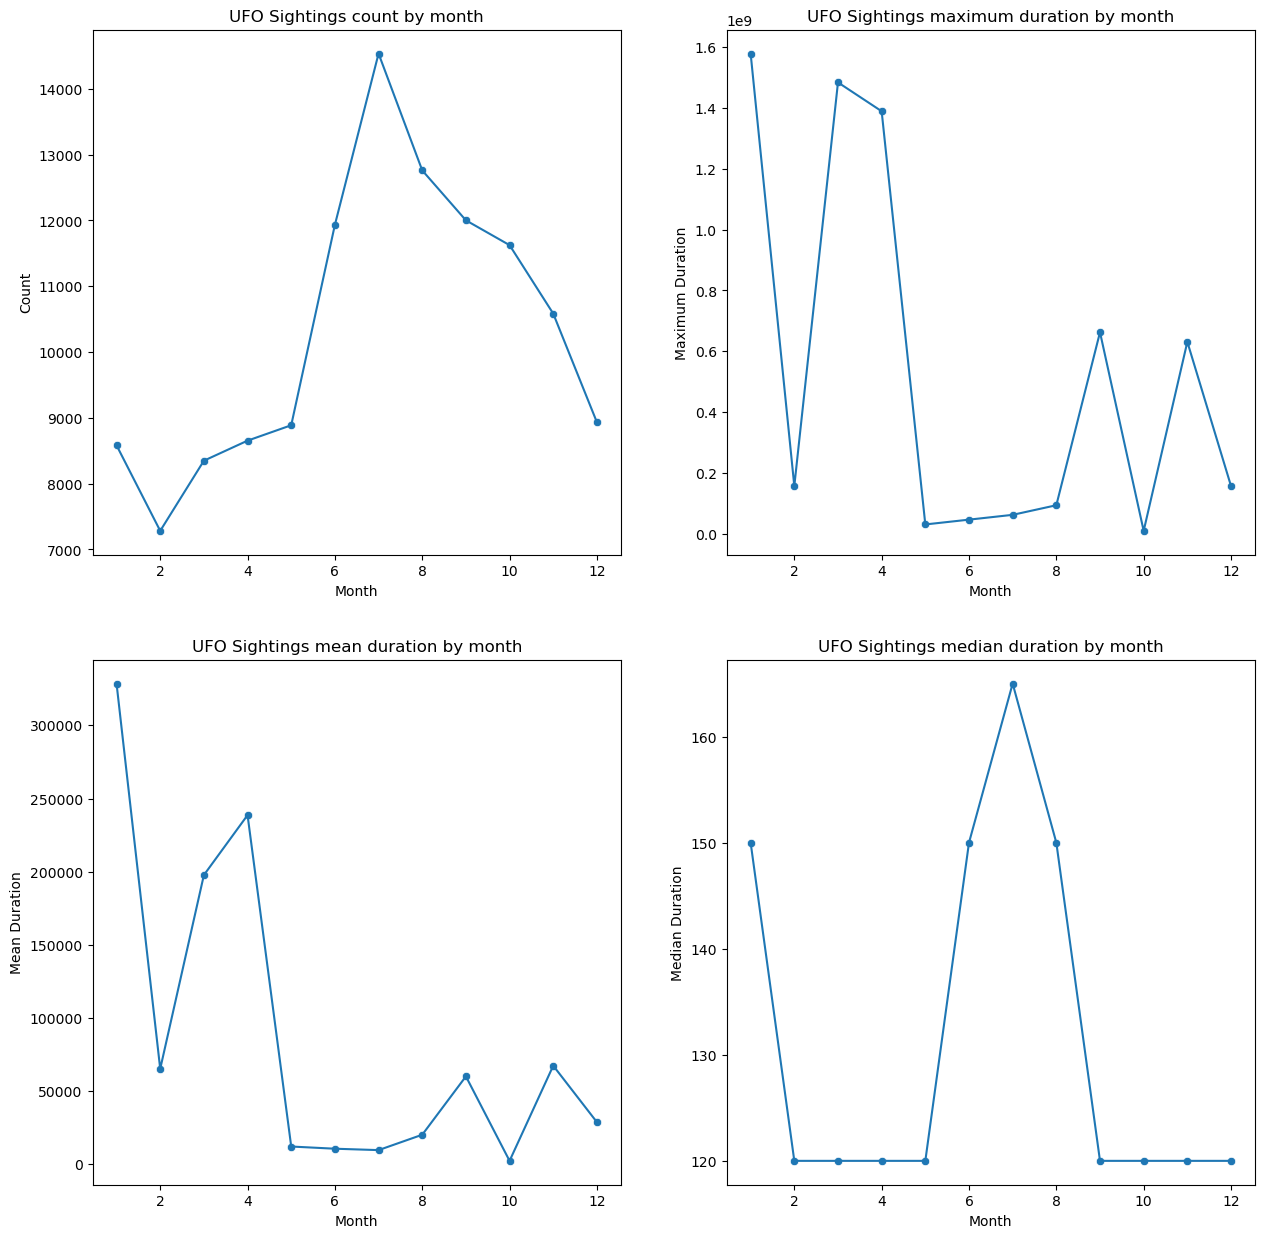

In [659]:
sightings_count = ufo_df.groupby('Month').count().reset_index()
month_mean = ufo_df.groupby('Month').Duration.mean().reset_index()
month_median = ufo_df.groupby('Month').Duration.median().reset_index()
month_max = ufo_df.groupby('Month').Duration.max().reset_index()




fig, axs = plt.subplots(2, 2, figsize=(15, 15))

fig1 = sns.scatterplot(x = "Month", y = "Duration", data = sightings_count, ax=axs[0,0])
sns.lineplot(x = "Month", y = "Duration", data = sightings_count, ax=axs[0,0])

fig1.set_xlabel('Month')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by month')



fig2 = sns.scatterplot(x = "Month", y = "Duration", data = month_mean, ax=axs[1,0])
sns.lineplot(x = "Month", y = "Duration", data = month_mean, ax=axs[1,0])

fig2.set_xlabel('Month')
fig2.set_ylabel('Mean Duration')
fig2.set_title('UFO Sightings mean duration by month')



fig3 = sns.scatterplot(x = "Month", y = "Duration", data = month_median, ax=axs[1,1])
sns.lineplot(x = "Month", y = "Duration", data = month_median, ax=axs[1,1])

fig3.set_xlabel('Month')
fig3.set_ylabel('Median Duration')
fig3.set_title('UFO Sightings median duration by month')



fig4 = sns.scatterplot(x = "Month", y = "Duration", data = month_max, ax=axs[0,1])
sns.lineplot(x = "Month", y = "Duration", data = month_max, ax=axs[0,1])

fig4.set_xlabel('Month')
fig4.set_ylabel('Maximum Duration')
fig4.set_title('UFO Sightings maximum duration by month');


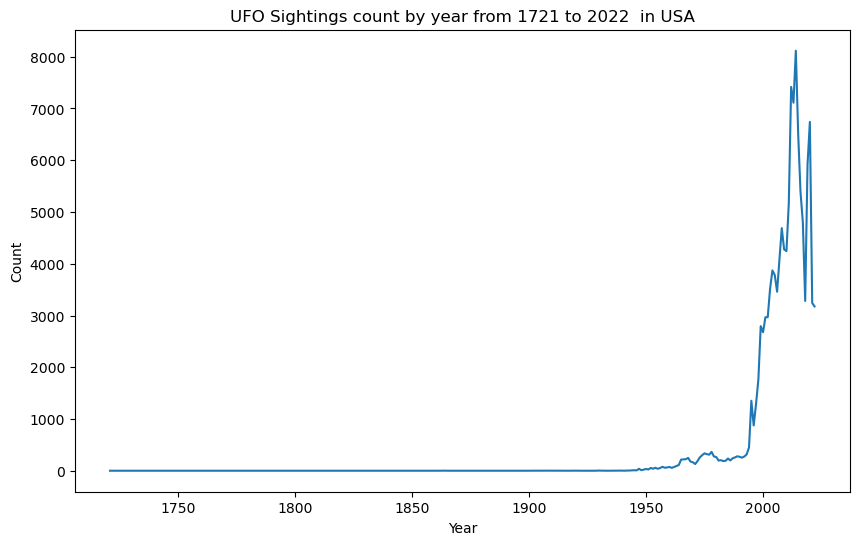

In [657]:
plt.figure(figsize=(10, 6))

sightings_count = ufo_df.groupby('Year').count().reset_index()


fig1 = sns.lineplot(x = "Year", y = "Duration", data = sightings_count)


fig1.set_xlabel('Year')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by year from {:.0f} to {:.0f}  in USA'.format(ufo_df.Date.dt.year.min(), ufo_df.Date.dt.year.max()))

plt.show()

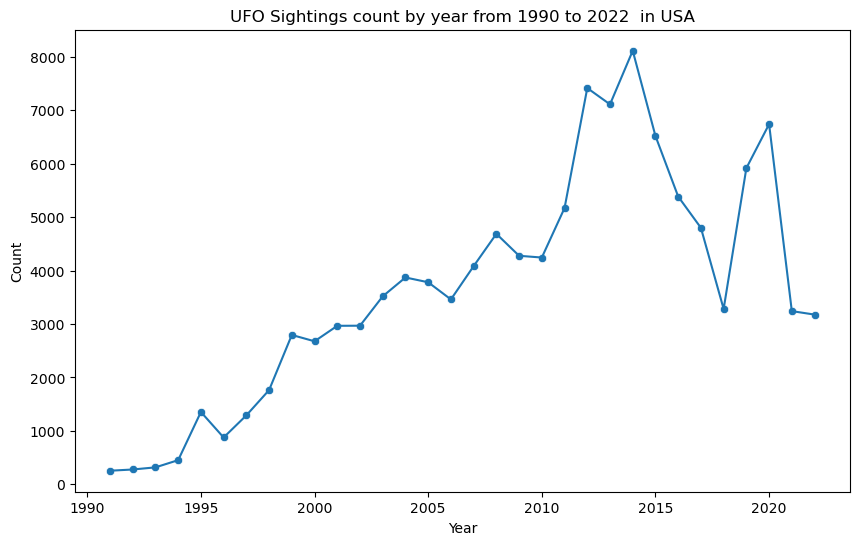

In [660]:
plt.figure(figsize=(10, 6))

# start year used in the plot 
year_figure = 1990

sightings_count = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').count().reset_index()


fig1 = sns.lineplot(x = "Year", y = "Duration", data = sightings_count)
sns.scatterplot(x = "Year", y = "Duration", data = sightings_count)

fig1.set_xlabel('Year')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))

plt.show()

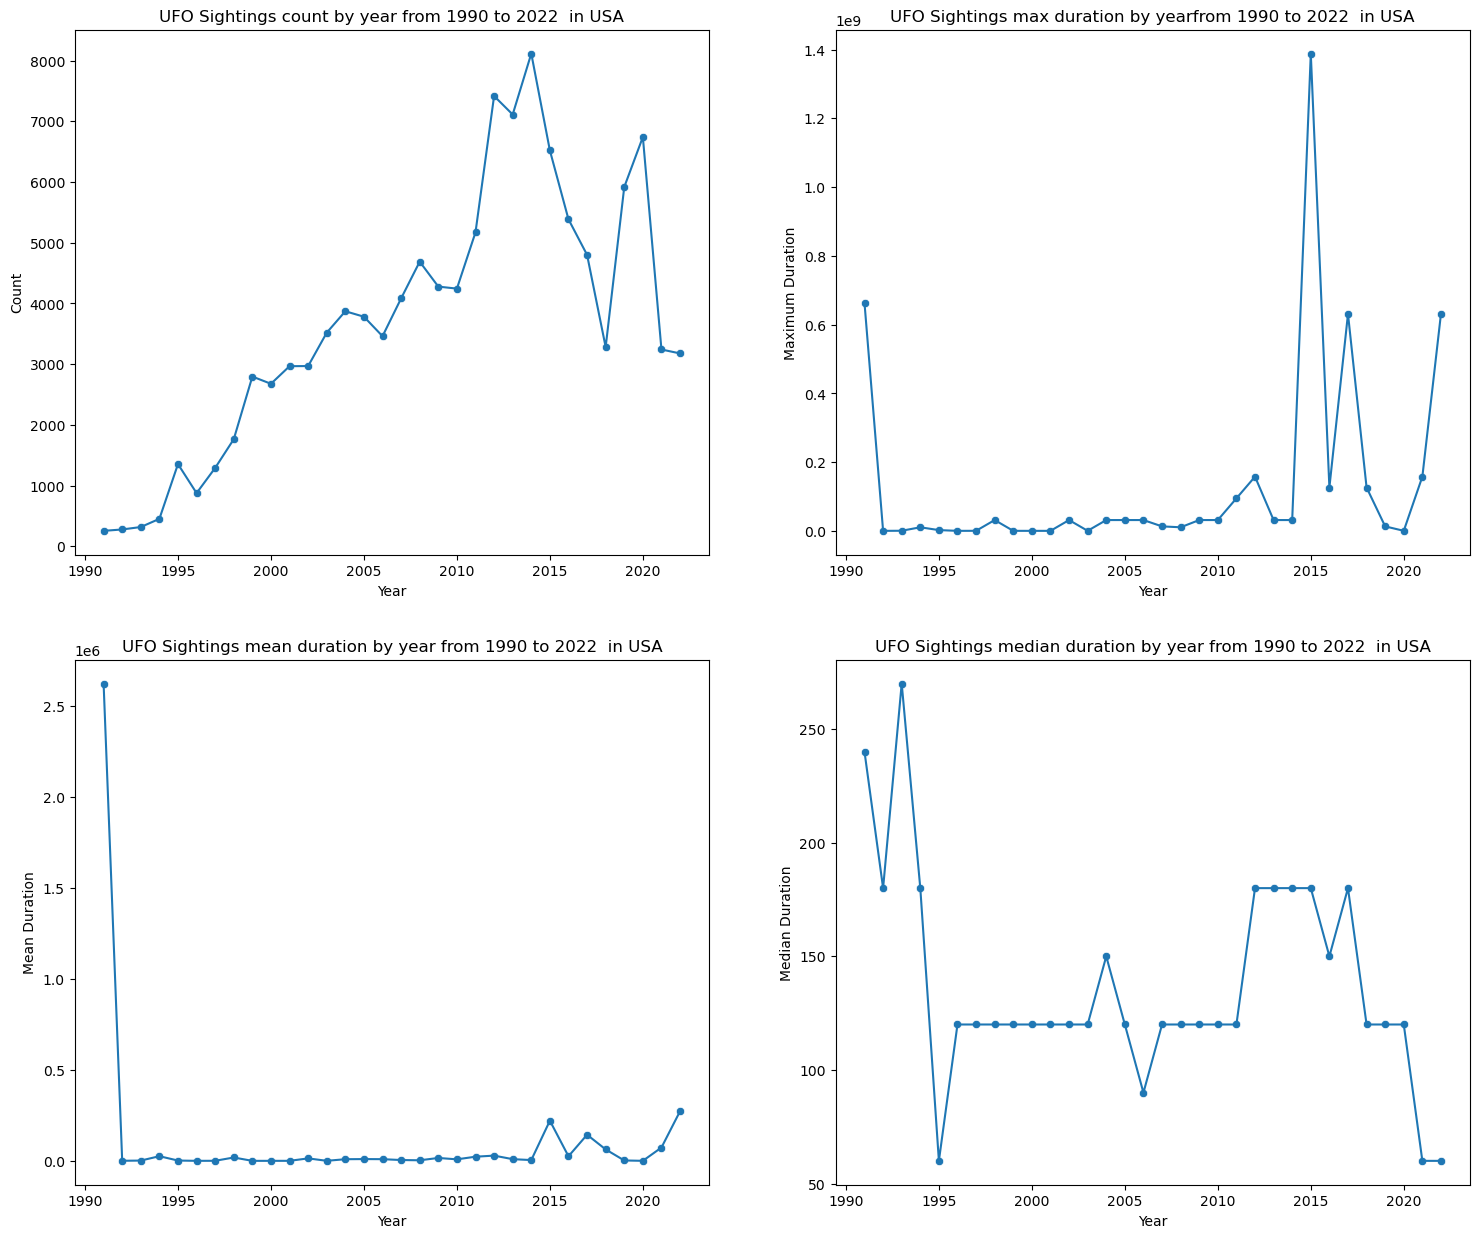

In [666]:
# start year used in the plot 
year_figure = 1990

sightings_count = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').count().reset_index()
year_mean = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').Duration.mean().reset_index()
year_median = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').Duration.median().reset_index()
year_max = ufo_df.loc[ufo_df.Year > year_figure].groupby('Year').Duration.max().reset_index()




fig, axs = plt.subplots(2, 2, figsize=(18, 15))

fig1 = sns.scatterplot(x = "Year", y = "Duration", data = sightings_count, ax=axs[0,0])
sns.lineplot(x = "Year", y = "Duration", data = sightings_count, ax=axs[0,0])

fig1.set_xlabel('Year')
fig1.set_ylabel('Count')
fig1.set_title('UFO Sightings count by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))



fig2 = sns.scatterplot(x = "Year", y = "Duration", data = year_mean, ax=axs[1,0])
sns.lineplot(x = "Year", y = "Duration", data = year_mean, ax=axs[1,0])

fig2.set_xlabel('Year')
fig2.set_ylabel('Mean Duration')
fig2.set_title('UFO Sightings mean duration by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))



fig3 = sns.scatterplot(x = "Year", y = "Duration", data = year_median, ax=axs[1,1])
sns.lineplot(x = "Year", y = "Duration", data = year_median, ax=axs[1,1])

fig3.set_xlabel('Year')
fig3.set_ylabel('Median Duration')
fig3.set_title('UFO Sightings median duration by year from {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()))



fig4 = sns.scatterplot(x = "Year", y = "Duration", data = year_max, ax=axs[0,1])
sns.lineplot(x = "Year", y = "Duration", data = year_max, ax=axs[0,1])

fig4.set_xlabel('Year')
fig4.set_ylabel('Maximum Duration')
fig4.set_title('UFO Sightings max duration by yearfrom {:.0f} to {:.0f}  in USA'.format(year_figure, ufo_df.Date.dt.year.max()));


## Parte 3 - Topic and Sentment Analysis

- Whats is the sighting report most common topic?
- Whats sentiment most common in the sighting report?
    - Make text analysis of the sighting report
    - Make a Wordclould with the sighting report text